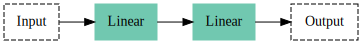

In [8]:
import nir
import nirviz
import importlib
importlib.reload(nirviz)
import numpy as np

w = np.random.randn(2, 2)
graph = nir.NIRGraph.from_list(nir.Linear(weight=w), nir.Linear(weight=w))
viz = nirviz.visualize(graph)
viz.show()

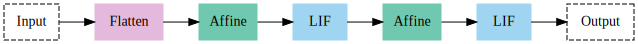

In [10]:
import snntorch as snn
import torch

importlib.reload(snn)
importlib.reload(nirviz)
import numpy as np

lif1 = snn.Leaky(beta=0.9, init_hidden=True)
lif2 = snn.Leaky(beta=0.9, init_hidden=True, output=True)

# Create a network
snntorch_network = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 500),
    lif1,
    torch.nn.Linear(500, 10),
    lif2
)

sample_data = torch.randn(1, 784)

# Export to nir
nir_model = snn.export_to_nir(snntorch_network, sample_data)


viz = nirviz.visualize(nir_model)
viz.show()

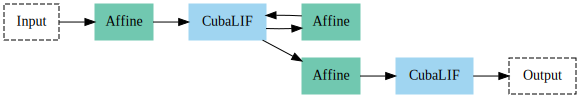

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.43.0 (0)
 -->
<!-- Title: %3 Pages: 1 -->
<svg width="580pt" height="98pt"
 viewBox="0.00 0.00 580.00 98.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 94)">
<title>%3</title>
<polygon fill="white" stroke="transparent" points="-4,4 -4,-94 576,-94 576,4 -4,4"/>
<!-- input -->
<g id="node1" class="node">
<title>input</title>
<polygon fill="none" stroke="black" stroke-dasharray="5,2" points="55,-90 0,-90 0,-54 55,-54 55,-90"/>
<text text-anchor="middle" x="27.5" y="-68.3" font-family="Times,serif" font-size="14.00">Input</text>
</g>
<!-- affine1 -->
<g id="node2" class="node">
<title>affine1</title>
<polygon fill="#71c8b0" stroke="#71c8b0" points="149,-90 91,-90 91,-54 149,-54 149,-90"/>
<text

In [6]:
a = np.random.randn(2)
ir = nir.NIRGraph(
    nodes={
        "input": nir.Input(input_type=np.array([2])),
        "affine1": nir.Affine(weight=np.zeros((2,2)), bias=False),
        "cu1": nir.CubaLIF(tau_mem=a, tau_syn=a, r=a, v_leak=a, v_threshold=a, v_reset=a),
        "affine_rec": nir.Affine(weight=np.zeros((2,2)), bias=False),
        "affine2": nir.Affine(weight=np.zeros((2,2)), bias=False),
        "cu2": nir.CubaLIF(tau_mem=a, tau_syn=a, r=a, v_leak=a, v_threshold=a, v_reset=a),
        "output": nir.Output(output_type=np.array([2]))
    },
    edges=[("input", "affine1"), ("affine1", "cu1"), ("affine_rec", "cu1"),  ("cu1", "affine_rec"), ("cu1", "affine2"), ("affine2", "cu2"), ("cu2", "output")])

viz = nirviz.visualize(ir)
viz.show()